# An example of using BluePyOpt/NeuronUnit Optimization
Using:
* Allen Brain Experimental data (`specimen_id=325479788`, sweep number `64`) to derive features from.
* EFEL feature extraction
* BluePyOpt Optimization.
* Numba JIT simple cell models (Adaptive Exponential).
* Neuronunit model scoring

In [1]:
import sys
sys.path.insert(0,'/home/user/git/revitalize/neuronunit')
del sys.path[-5]
#print(sys.path)

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(context="paper", font="monospace")
%matplotlib inline
SILENT = True
import warnings
if SILENT:
    warnings.filterwarnings("ignore")
import neuronunit
print(neuronunit.__file__)
from neuronunit.plotting.plot_utils import check_bin_vm_soma
from neuronunit.allenapi.allen_data_driven import opt_setup
from nb_utils import optimize_job
from sciunit.scores import RelativeDifferenceScore
import pandas as pd
import pickle
import quantities as pq
specimen_id = 325479788


/home/user/git/revitalize/neuronunit/neuronunit/__init__.py


In [2]:
def test_opt_relative_diff(specimen_id,model_type = "ADEXP",efel_filter_iterable=None):
    if model_type in str("IZHI"):
        fitnesses,scores,obs_preds,opt,target,hall_of_fame,cell_evaluator = optimize_job(specimen_id,
                                                     model_type,
                                                     score_type=RelativeDifferenceScore,
                                                     efel_filter_iterable=efel_filter_iterable, MU =25,NGEN=190)
    else:
        fitnesses,scores,obs_preds,opt,target,hall_of_fame,cell_evaluator = optimize_job(specimen_id,
                                                     model_type,
                                                     score_type=RelativeDifferenceScore,
                                                     efel_filter_iterable=efel_filter_iterable, MU =20,NGEN=90)
        
    return obs_preds,opt,target,hall_of_fame,cell_evaluator


# Below is a plot of vm trace for fitting the simple model to with neuron unit.
* It is from Allen Specimen id `325479788`, sweep number `64`.
* sweep number 


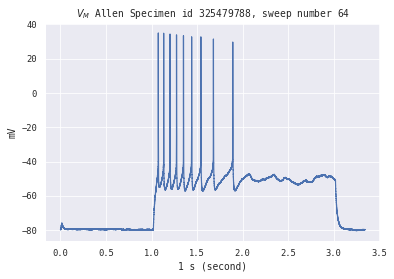

In [3]:

with open('325479788later_allen_NU_tests.p', "rb") as f:
    suite = pickle.load(f)
    
plt.plot(suite.traces["vm_soma"].times,suite.traces["vm_soma"])
plt.xlabel(pq.s)
plt.ylabel(suite.traces["vm_soma"].dimensionality)
plt.title("$V_{M}$ Allen Specimen id 325479788, sweep number 64")
plt.show()


# Example 2
* AdExp model 
* Allen specimen 325479788
You will notice that all the features are timinig related, and some would seem redudandant. This is because one must use brute force to get a good fit, for this particular problem.

Next can use sensativity analysis on the genes to find out which genes needed varying.

In [ ]:
efel_filter_iterable = {
    "ISI_log_slope":None,
    "mean_frequency":None,
    "adaptation_index2":None,
    "first_isi":None,
    "ISI_CV":None,
    "median_isi":None,
    "Spikecount":None,
    "all_ISI_values":None,
    "ISI_values":None,
    "time_to_first_spike":None,
    "time_to_last_spike":None,
    "time_to_second_spike":None,
    "peak_voltage":None,
    "base_voltage":None

}
( obs_preds,
    opt,
    target,
    hall_of_fame,
    cell_evaluator )  = test_opt_relative_diff(specimen_id = 325479788,
                                                                          model_type="IZHI",
                                                                          efel_filter_iterable=efel_filter_iterable)


<class 'jithub.models.model_classes.IzhiModel'>


  command:

    streamlit run /home/user/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py [ARGUMENTS]
2021-03-14 15:22:51.846 WARNING root: 
  command:

    streamlit run /home/user/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py [ARGUMENTS]


2  	24    	2777.6 	6290.85	32.9866	20000
3  	6     	369.629	352.22 	32.9866	1108.77
4  	6     	792.528	480.619	32.9866	1108.77
5  	6     	1066.22	2069.31	20.4921	6028.93
6  	6     	85.3995	132.563	20.4921	409.616
7  	6     	134.996	173.721	20.4921	409.608
8  	6     	82.3783	133.687	20.3137	409.614
9  	6     	80.8911	134.284	18.4724	409.609
10 	6     	133.574	174.648	18.4724	409.622
11 	6     	188.281	186.993	18.4724	409.616
12 	6     	132.629	175.252	18.4724	409.627
13 	6     	72.1063	124.305	18.4724	376.403
14 	6     	86.5393	139.504	18.4724	428.065
15 	6     	143.301	180.2  	18.4724	428.181
16 	6     	22.3813	6.18571	18.4724	32.6334
17 	6     	78.5597	119.247	18.4724	370.421
18 	6     	81.9714	141.446	18.4724	428.166
19 	6     	84.6184	140.32 	18.4724	428.167
20 	6     	249.932	200.542	18.4724	428.167
21 	6     	18.4724	3.55271e-15	18.4724	18.4724
22 	6     	18.4724	3.55271e-15	18.4724	18.4724
23 	6     	76.9723	143.295    	18.4724	427.971
24 	6     	18.4724	3.55271e-15	18.4724	18.47

In [ ]:

check_bin_vm_soma(target,opt)

In [ ]:
params = opt.attrs_to_params()
params = pd.DataFrame([params])
params

In [ ]:
df = pd.DataFrame(obs_preds)
df.rename(columns={0:'EFEL_feature_NU_test_Name',1:'prediction',2:'observation',3:'neuronunit_score'},inplace=True)
df

# Example 2
* Now fit Adaptive Exponential model to a single sweep from Allen specimen 325479788 sweep number 64

In [ ]:
check_bin_vm_soma(target,opt)

In [ ]:
params = opt.attrs_to_params()
params = pd.DataFrame([params])
params

## 